In [119]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.plotly as py
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import statistics
import urllib.request
from urllib.request import urlopen

In [ ]:
def downloadFile():
    url = urlopen("https://s3.amazonaws.com/assignment3datasets/bank.zip")
    path = str(os.getcwd())
    z = ZipFile(BytesIO(url.read()))
    with z as zfile:
        zfile.extractall(path)
    print("Dataset Downloaded")
downloadFile()

### Data Ingestion

In [24]:
df_test = pd.read_csv("bank-additional/bank-additional.csv", sep=';')
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=';')

In [23]:
df_before_outlier_removal = pd.read_csv("bank-additional/bank-additional-full.csv", sep=';')

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
#Understand dataset datatype and total count. There 7 numerical feature and 10 categorical feature
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [27]:
#Following five=point summary given only to the available numerical data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The continuous variables seem clean and well populated except **"pdays"** and **"previous"** where value "999" and "0" are most distributed.

In [28]:
df.shape
df_test.shape

(41188, 21)

(4119, 21)

## Data Cleaning

In [15]:
# To verify whether NA values present in the dataset or not 
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [29]:
#Renamed the target feature 'y' that describes a customer is subscribed to a term deposit or not
df=df.rename(columns={'y':'result'})
df_test=df_test.rename(columns={'y':'result'})

In [30]:
#Renaming column names where required
df= df.rename(columns={'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'})
df_test= df_test.rename(columns={'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'})

Lets check each feature if cleaning required are not. There are total 21 columns including the target column. In which 11 features are **categorical** and 10 are **numerical**.

### Age feature:

In [38]:
df.age.unique()

array([30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 55, 40,
       28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54, 59,
       43, 53, 50, 75, 82, 71, 57, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)

There are no abnormal values in **"age"** feature such as NaN or negative values. Lets plot box plot to figure any outliers

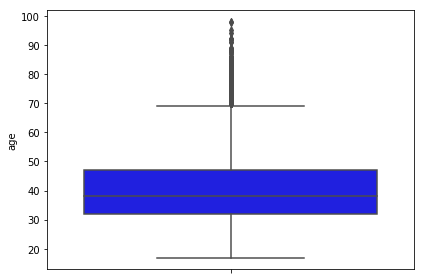

In [13]:
#Boxplot for Age feature
sns.boxplot(y='age',data=df,color='Blue')
plt.tight_layout()

In [77]:
age = df[df['age'] > 70]
age.age.count()

422

In [78]:
#Percentage of extreme values in the whole dataset
age_percentage = (age.age.count()*100)/df.age.count()
print("The precentage of extreme values in age feature:", age_percentage,"%" )

The precentage of extreme values in age feature: 1.0245702631834515 %


Considering the fact that the above **1%** contains age value above 70 which are needed to train our model since our model needs to evaluate customers who have age between 70 and 100. They are mostly categorised as **retired** in **"job"** feature.

### Duration feature:

In [14]:
df[df['duration'] == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,result
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


As mentioned in the provided feature description, if call duration is **0** then the target feature value **result** is **no**

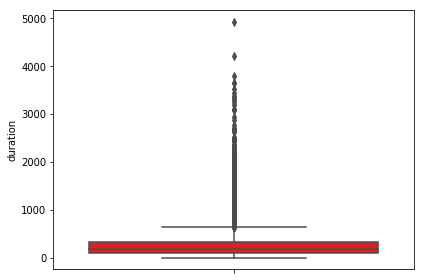

In [15]:
sns.boxplot(y='duration',data=df,color='Red')
plt.tight_layout()

In [59]:
#Dropping Duration column:
df.drop("duration", axis=1, inplace=True)
df_test.drop("duration", axis=1, inplace=True)

This attribute highly affects the output target. Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Campaign feature:

In [16]:
df.campaign.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

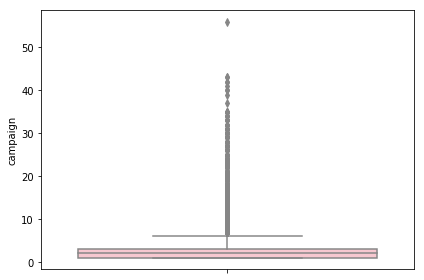

In [17]:
#Box plot for campaign
sns.boxplot(y='campaign',data=df,color='Pink')
plt.tight_layout()

Hence removing extreme values with **remove_outliers** function considering observation which are only within the third standard deviation. (As per **3-sigma rule** which indicates 99.7% of the value in a data comes under third std)

### pdays feature:

In [18]:
df.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

As stated by documentation, value **"999"** indicates that the client was not previously contacted. Hence inorder to avoid model to incline on the basis of higher value, we are planning to replace it by **"0"**

In [31]:
# Replaced all "999" values with "0" that indicates client was not previously contacted
df.loc[df.pdays == 999, 'pdays'] = 0
df_test.loc[df_test.pdays == 999, 'pdays'] = 0

### Previous feature:

In [134]:
df.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022765F5C198>]],
      dtype=object)

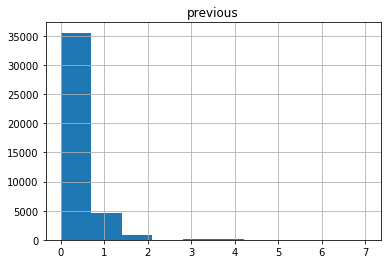

In [138]:
df.hist(column="previous")

In [140]:
prev_box = df[df['previous'] > 3]
pd.crosstab(prev_box.previous, prev_box.result)

result,no,yes
previous,,
4,32,38
5,5,13
6,2,3
7,1,0


The number of **"yes"** in "previous" column is just 1.3% of the total number of values in our target value. We can remove the entier value but by which we might remove the rows values from other important feature that are required in our dataset for training. Hence leaving the feature alone.

### Employment variation rate feature:

In [20]:
df.emp_var_rate.unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

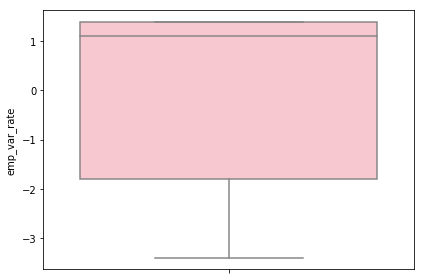

In [22]:
sns.boxplot(y='emp_var_rate',data=df,color='Pink')
plt.tight_layout()

Higher the negative values, the customer is more inclined to economy depression or recession ( such as being fired from a job ). The box plot shows no outliers , hence moving forward with next set of features.

### Consumer price index feature:

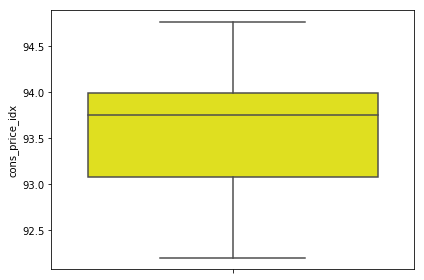

In [23]:
sns.boxplot(y='cons_price_idx',data=df,color='Yellow')
plt.tight_layout()

No outliers , hence leaving this feature aside.

### Consumer confidence index feature:

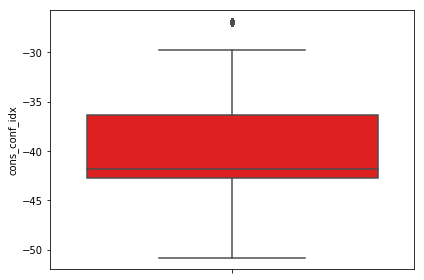

In [30]:
sns.boxplot(y='cons_conf_idx',data=df,color='Red')
plt.tight_layout()

The outlier will be removed using **remove_outliers** function

### Euribor 3 month rate feature:

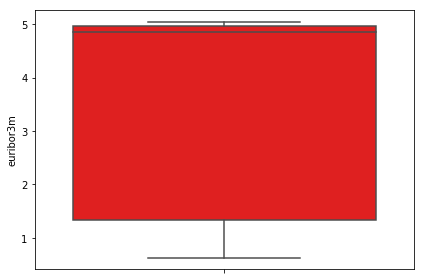

In [25]:
sns.boxplot(y='euribor3m',data=df,color='Red')
plt.tight_layout()

No outliers and the data within the feature is clean

### Number of employees - quarterly indicator feature:

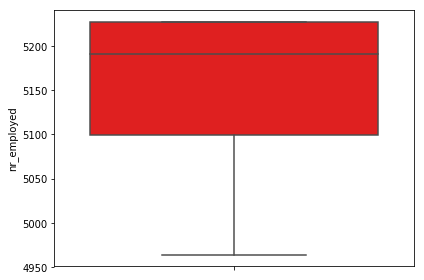

In [26]:
sns.boxplot(y='nr_employed',data=df,color='Red')
plt.tight_layout()

No outliers. Now, we ll analyse the categorical features in the dataset. As mentioned in the documentation, lets try to clean the features with **"unknown"** value.

In [77]:
def remove_outliers(data,m=3):
    data_1 = [x for x in data if (x > np.mean(data) - 3 * np.std(data))]
    data = [x for x in data_1 if (x < np.mean(data) + 3 * np.std(data))]
    return data

df = df[df.campaign.isin(remove_outliers(df.campaign))][df.cons_conf_idx.isin(remove_outliers(df.cons_conf_idx))]
df_test = df_test[df_test.campaign.isin(remove_outliers(df_test.campaign))][df_test.cons_conf_idx.isin(remove_outliers(df_test.cons_conf_idx))]

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Creating a csv files for the cleaned data below :

In [78]:
df.to_csv('modifiedBankData_train.csv')
df_test.to_csv('modifiedBankData_test.csv')

In [79]:
print("The Shape of dataframe after cleaning numerical features :", df.shape)
print("The Shape of dataframe before cleaning numerical features :", df_before_outlier_removal.shape)

The Shape of dataframe after cleaning numerical features : (38582, 20)
The Shape of dataframe before cleaning numerical features : (41188, 21)


Now , lets see the categorical features.

In [51]:
df.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,result
count,39473,39473,39473,39473,39473,39473,39473,39473,39473,39473,39473
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent,no
freq,9959,23885,11667,31275,20722,32549,25181,13337,8208,33948,35368


There are totall 11 categorical variables

In [62]:
categorical_vars = df.describe(include=["object"]).columns
#Contain on numerical data
continuous_vars = df.describe().columns

In [55]:
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'result'],
      dtype='object')

In [53]:
categorical_vars.isnull().sum()

0

From above we can infer that there are no NaN values in the categorical features but in the document provided along with the dataset, it clearly mentioned that missing values are labeled as **"unknown"**. Lets calulate the no of **"unknown"** values in the features.

In [58]:
df.job.unique()
df.marital.unique()
df.education.unique()
df.default.unique()
df.housing.unique()
df.loan.unique()
df.contact.unique()
df.month.unique()
df.day_of_week.unique()
df.result.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

array(['no', 'unknown', 'yes'], dtype=object)

array(['no', 'yes', 'unknown'], dtype=object)

array(['no', 'yes', 'unknown'], dtype=object)

array(['telephone', 'cellular'], dtype=object)

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

array(['no', 'yes'], dtype=object)

In [46]:
#Categorical features with unknown values
job = df[df['job'] == 'unknown']
print("job count:",job['job'].value_counts(),"\n\n")
marital = df[df['marital'] == 'unknown']
print("marital count:",marital['marital'].value_counts(),"\n\n")
education = df[df['education'] == 'unknown']
print("education count:",education['education'].value_counts(),"\n\n")
default = df[df['default'] == 'unknown']
print("default count:",default['default'].value_counts(),"\n\n")
housing = df[df['housing'] == 'unknown']
print("housing count:",housing['housing'].value_counts(),"\n\n")
loan = df[df['loan'] == 'unknown']
print("loan count :",loan['loan'].value_counts(),"\n\n")

job count: unknown    315
Name: job, dtype: int64 


marital count: unknown    74
Name: marital, dtype: int64 


education count: unknown    1651
Name: education, dtype: int64 


default count: unknown    8195
Name: default, dtype: int64 


housing count: unknown    949
Name: housing, dtype: int64 


loan count : unknown    949
Name: loan, dtype: int64 




We are handling the unknown values as one type of class for the particular feature. 

## Exploratory Data Analysis

### Visualizing Distribution of Continuous Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027A49275240>,
      dtype=object)

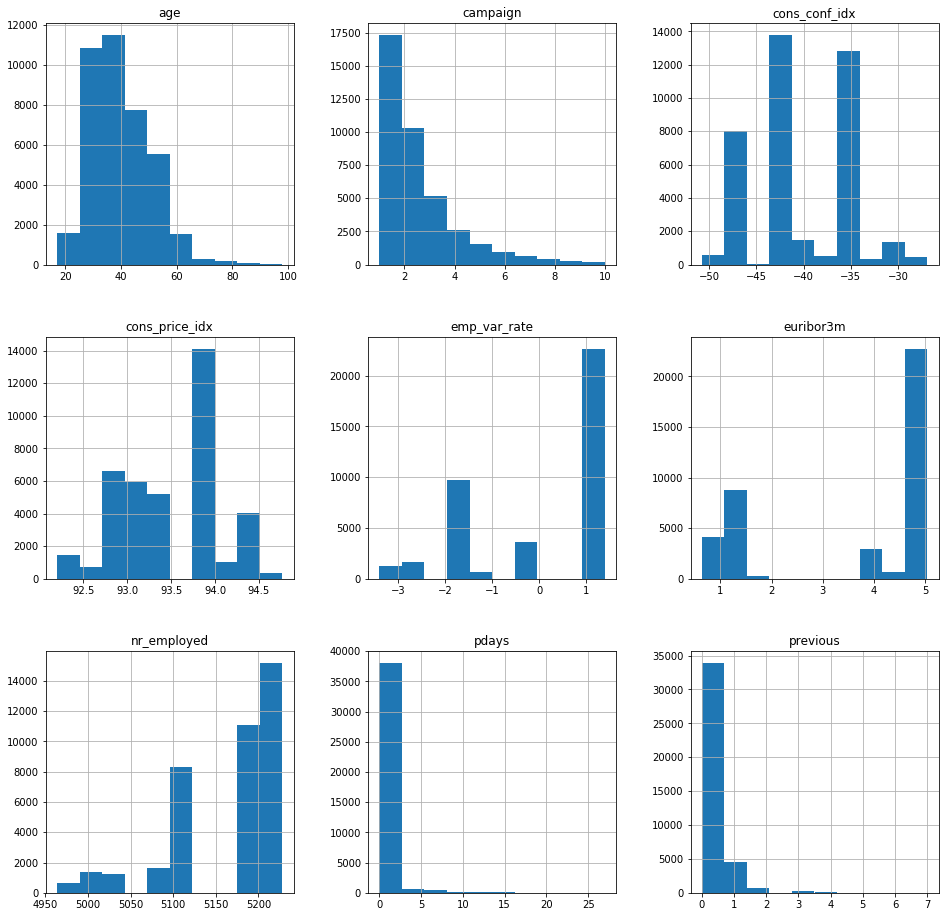

In [63]:
df.hist(column=continuous_vars, figsize = (16,16))

From above it is clear that the data is skewed towards both left and right except **'cons_price_idx'** and **'cons_conf_idx'** i.e. existence of skewness brings us to a point that data is non-linear, asymmetric .Hence selection of features will not depend upon correlation factor.Also not a single feature is correlated completely with 'target', hence requires combinantion of features.

### Visualizing Distribution of Categorical Variables

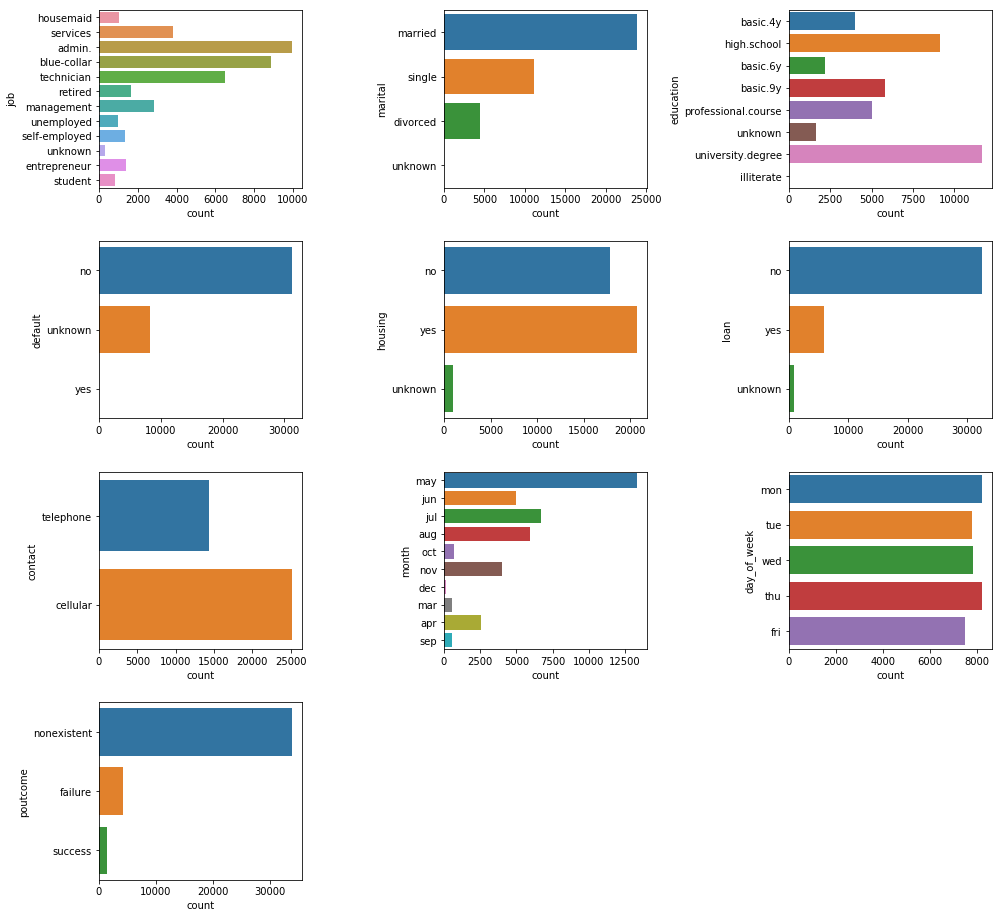

In [65]:
# Count plots of categorical variables

fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)

Above plot shows the number classes occurence in each categorical feature. There has been more number of customer campaiging happened on the month of **may**. And most of the customers have **admin** as their employment with marital status as **married** and have  **no loan** in the bank.

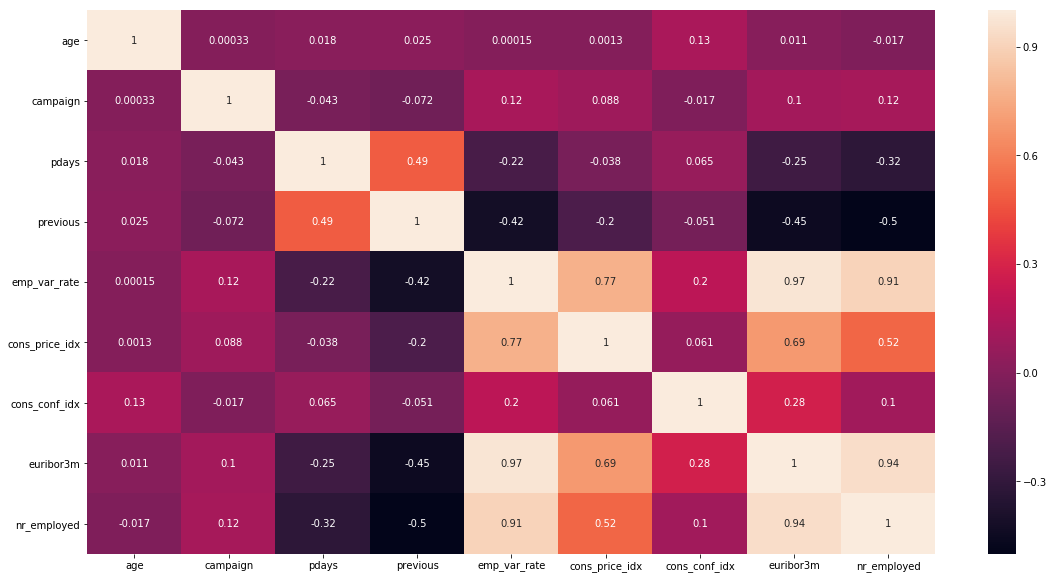

In [66]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

From correlation for the available numerical data we can infer that there is a highest correlation between **'pdays'** and **'previous'** and this prove our theoritical finding out its correlation. The next one in line is between **'campaign'** and **'day'**.

(-1.1027728232454828,
 1.1001320392021658,
 -1.1072882525375083,
 1.1064343036278486)

Text(0.5,1,'Only 10.40% records are belong to Yes')

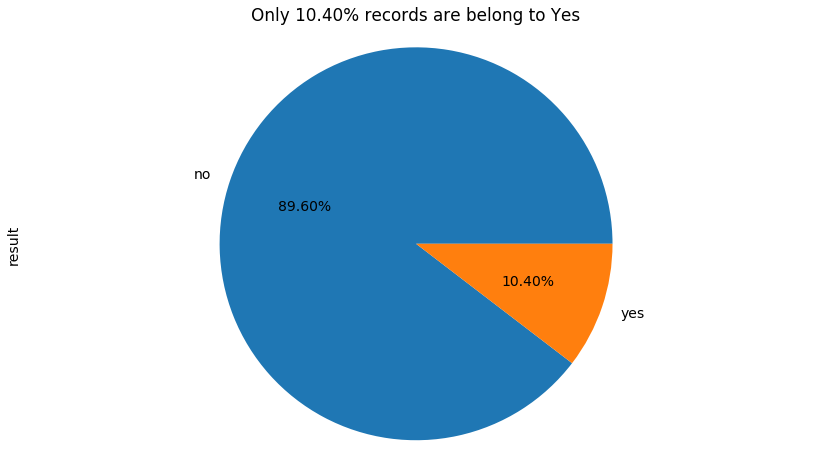

 Target Result 
 no     35368
yes     4105
Name: result, dtype: int64 




In [70]:
plt.figure(figsize=(14,8))
plt.rc('font', size=14)        
df['result'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.title("Only 10.40% records are belong to Yes")
plt.show()
print(" Target Result \n",df['result'].value_counts(),"\n\n")

Most of the dataset consists of cactegorical features. In-order analysis the categorical values, we first consider **_'job'_** feature with respect to our target feature.

In [88]:
# No. of 'yes' and 'no' by the customers grouped according to the 'job' type.
pd.crosstab(df.job, df.result)

result,no,yes
job,,
admin.,8520,1211
blue-collar,8169,498
entrepreneur,1263,102
housemaid,886,97
management,2473,289
retired,1214,403
self-employed,1203,124
services,3450,276
student,574,266


In [89]:
#By normalising we would get exact percentage of each 'job' type
pd.crosstab(df.job, df.result, normalize='index')

result,no,yes
job,,
admin.,0.875552,0.124448
blue-collar,0.942541,0.057459
entrepreneur,0.925275,0.074725
housemaid,0.901322,0.098678
management,0.895366,0.104634
retired,0.750773,0.249227
self-employed,0.906556,0.093444
services,0.925926,0.074074
student,0.683333,0.316667


(-1.1083749317306384,
 1.1003988065094283,
 -1.101468427357971,
 1.1127141170079675)

Text(0.5,1,"Percentage of subscribed custosmer categorised by 'job' type")

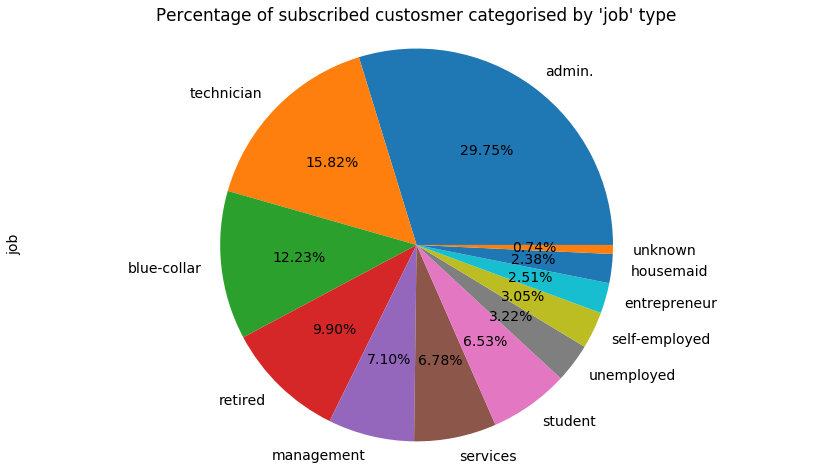

 job result 
 admin.           1211
technician        644
blue-collar       498
retired           403
management        289
services          276
student           266
unemployed        131
self-employed     124
entrepreneur      102
housemaid          97
unknown            30
Name: job, dtype: int64 




In [90]:
target_yes_df = df[df['result'] == 'yes']
plt.figure(figsize=(14,8))
plt.rc('font', size=14)        
target_yes_df['job'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.title("Percentage of subscribed custosmer categorised by 'job' type")
plt.show()
print(" job result \n",target_yes_df['job'].value_counts(),"\n\n")

(-1.113142063877362,
 1.1006258127687225,
 -1.1011352728649026,
 1.1050043694820304)

Text(0.5,1,"Percentage of custosmer not subscribed categorised by 'job' type")

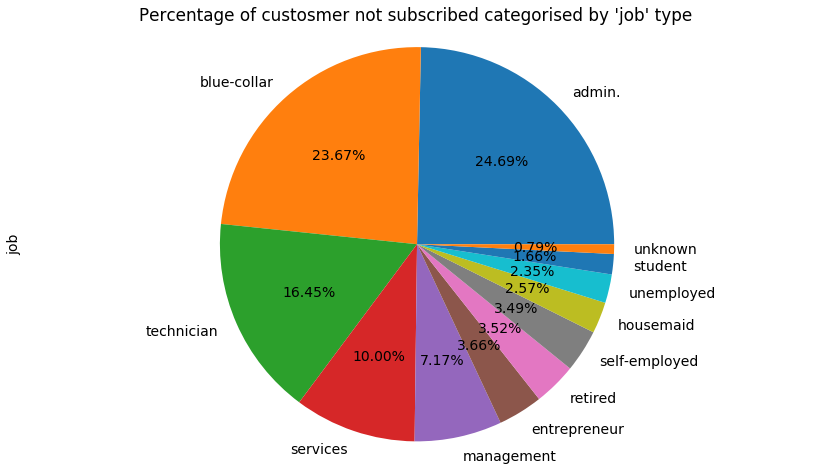

 job result 
 admin.           8520
blue-collar      8169
technician       5676
services         3450
management       2473
entrepreneur     1263
retired          1214
self-employed    1203
housemaid         886
unemployed        810
student           574
unknown           273
Name: job, dtype: int64 




In [91]:
target_no_df = df[df['result'] == 'no']
plt.figure(figsize=(14,8))
plt.rc('font', size=14)        
target_no_df['job'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.title("Percentage of custosmer not subscribed categorised by 'job' type")
plt.show()
print(" job result \n",target_no_df['job'].value_counts(),"\n\n")

From above analysis with **'job'** feature it is evident that the most subscribed customers are with job lable **'admin'** with a count **_1211_** and the most un-subscribed customers are **'admin'** with count of **_8520_**. But the highest percentage of subscription according to the job type is customers with job type as **'student'** with **0.3 %**.

In [93]:
pd.crosstab(df.marital, df.result)

result,no,yes
marital,,
divorced,3906,420
married,21157,2184
single,9388,1457
unknown,60,10


In [94]:
pd.crosstab(df.marital, df.result, normalize='index')

result,no,yes
marital,,
divorced,0.902913,0.097087
married,0.906431,0.093569
single,0.865652,0.134348
unknown,0.857143,0.142857


In [104]:
target_yes_df.shape
target_no_df.shape
df.shape

(4071, 20)

(34511, 20)

(38582, 20)

(-1.108941955734959,
 1.1004258074159505,
 -1.1184859449648448,
 1.1108955282089994)

Text(0.5,1,"Percentage of custosmer subscribed categorised by 'marital' type")

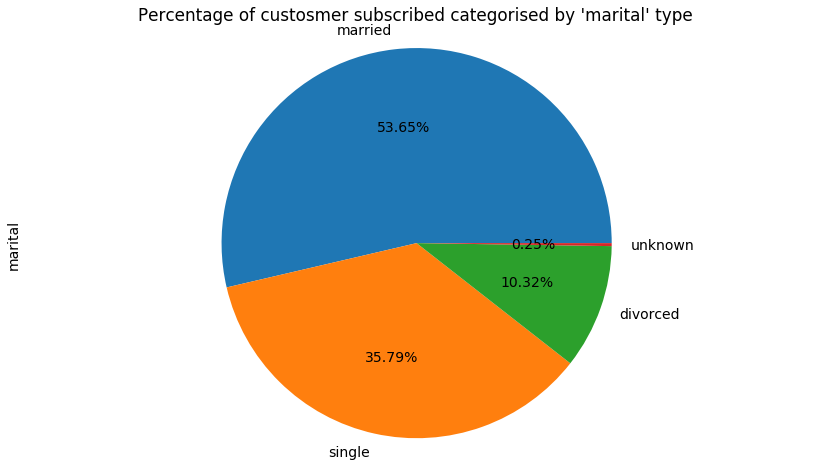

 Marital Result 
 married     2184
single      1457
divorced     420
unknown       10
Name: marital, dtype: int64 




In [98]:
plt.figure(figsize=(14,8))
plt.rc('font', size=14)        
target_yes_df['marital'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.title("Percentage of custosmer subscribed categorised by 'marital' type")
plt.show()
print(" Marital Result \n",target_yes_df['marital'].value_counts(),"\n\n")

Out of 38582 , there are 4071 customers that are subcribered where in married as per bank deatils in which 2755 which is approximately 10% are subscribed but the highest percentage are who subscribed are **'single'** with 14% though they contribute 28.29% in the overall customers.

 Education Result 
 university.degree      11387
high.school             8916
basic.9y                5690
professional.course     4919
basic.4y                3906
basic.6y                2133
unknown                 1614
illiterate                17
Name: education, dtype: int64 




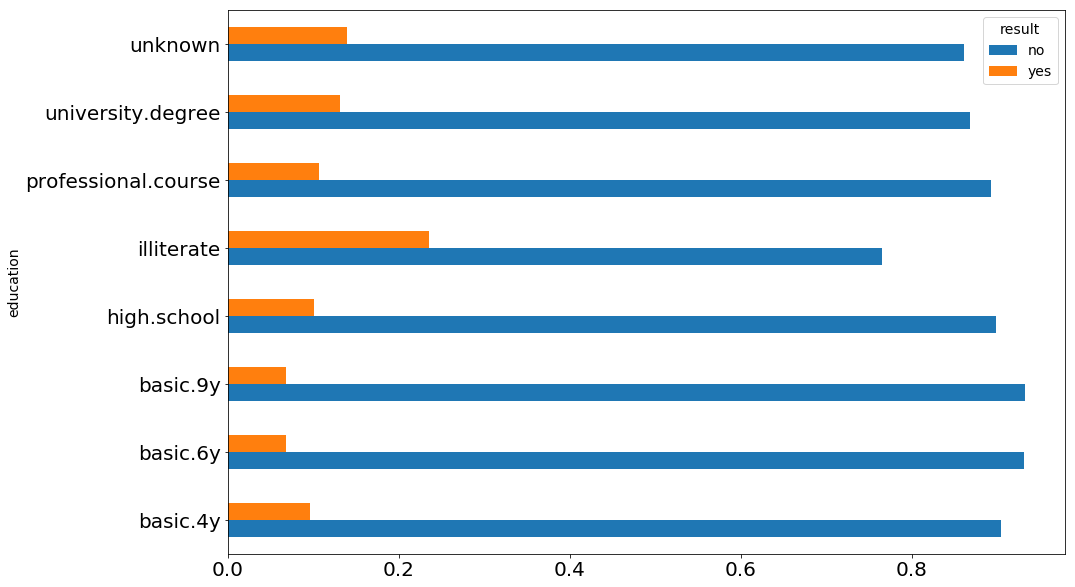

In [175]:
pd.crosstab(df.education, df.result, normalize='index').plot(kind='barh',figsize=(15,10),fontsize=20)
print(" Education Result \n",df['education'].value_counts(),"\n\n")

Most of the customers have education category has **_'university.degree'_** with a count of **11387** but still customers with **_'illiterate'_** has the highest percentage of subscription.

In [129]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'result', 'count', 'age_group', 'Adult',
       'Middle_Aged', 'old'],
      dtype='object')

In [111]:
pd.crosstab(df.month, df.result, normalize='index')

result,no,yes
month,,
apr,0.806515,0.193485
aug,0.901448,0.098552
dec,0.511494,0.488506
jul,0.919938,0.080062
jun,0.899544,0.100456
mar,0.491493,0.508507
may,0.944113,0.055887
nov,0.906901,0.093099
oct,0.559201,0.440799


 Month Result 
 may    13062
jul     6470
aug     5733
jun     4828
nov     3985
apr     2548
oct      701
sep      552
mar      529
dec      174
Name: month, dtype: int64 




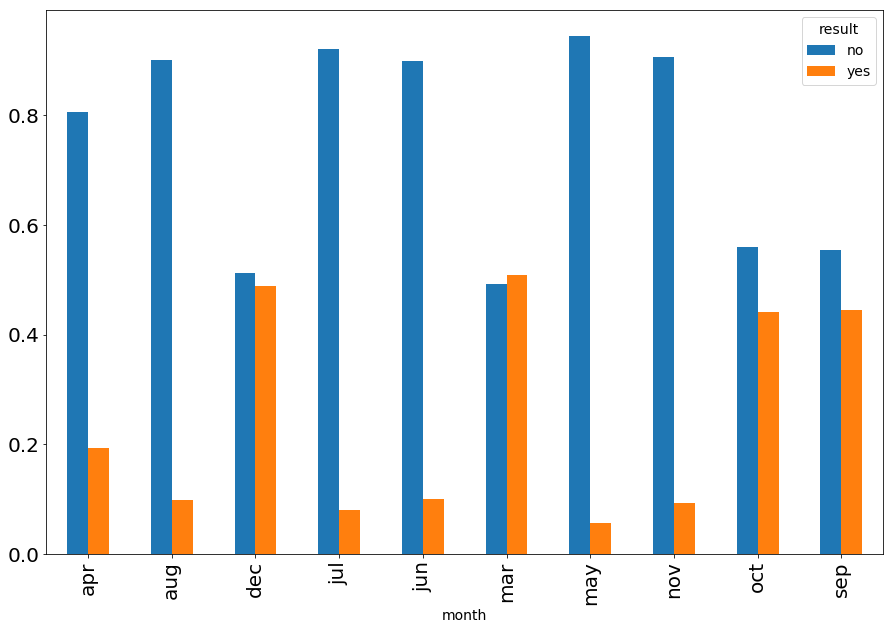

In [176]:
pd.crosstab(df.month, df.result, normalize='index').plot(kind='bar',figsize=(15,10),fontsize=20)
print(" Month Result \n",df['month'].value_counts(),"\n\n")

Only on the month of **march** there is high percentage of subcription for the term deposit

Now lets analyse with **Age** feature.

In [126]:
df['Adult'] = 0
df['Middle_Aged'] = 0
df['old'] = 0    
df.loc[(df['age'] <= 35) & (df['age'] >= 18),'Adult'] = 1
df.loc[(df['age'] <= 60) & (df['age'] >= 36),'Middle_Aged'] = 1
df.loc[df['age'] >=61,'old'] = 1

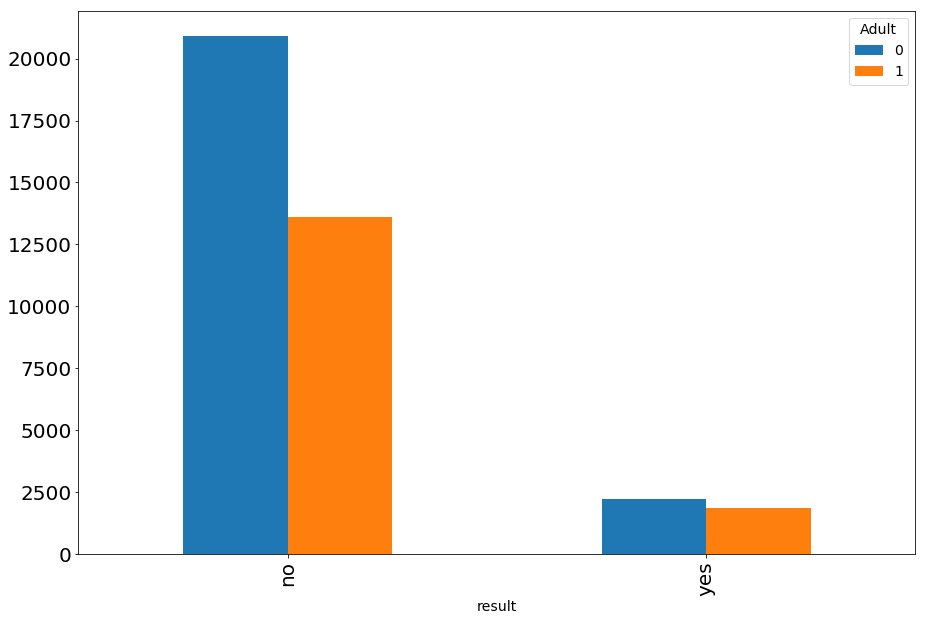

In [177]:
pd.crosstab(df.result,df.Adult).plot(kind='bar',figsize=(15,10),fontsize=20)

In [140]:
df['Adult'].value_counts()

0    23108
1    15474
Name: Adult, dtype: int64

1    22222
0    16360
Name: Middle_Aged, dtype: int64

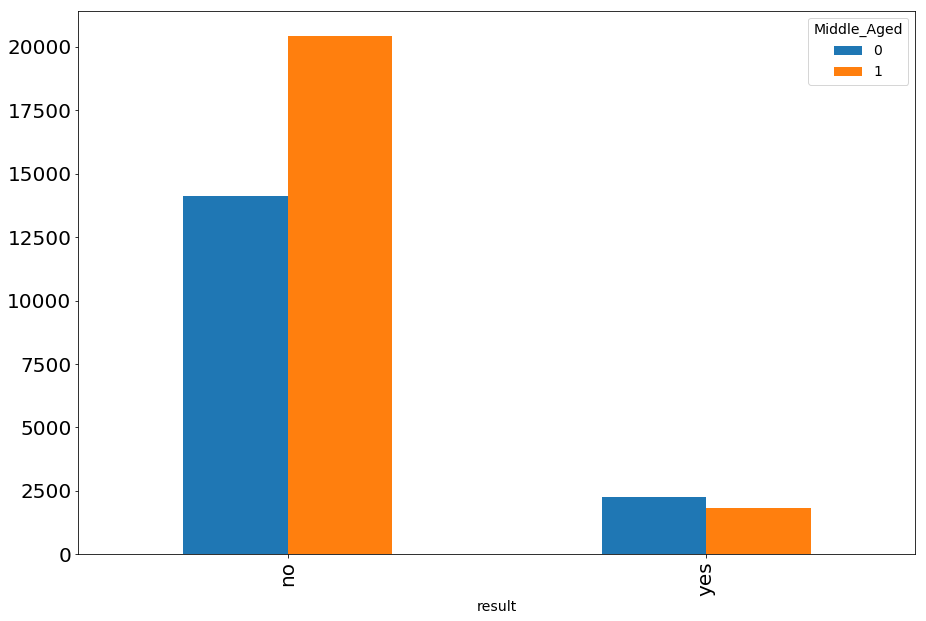

In [178]:
df['Middle_Aged'].value_counts()
pd.crosstab(df.result,df.Middle_Aged).plot(kind='bar',figsize=(15,10),fontsize=20)

0    37701
1      881
Name: old, dtype: int64

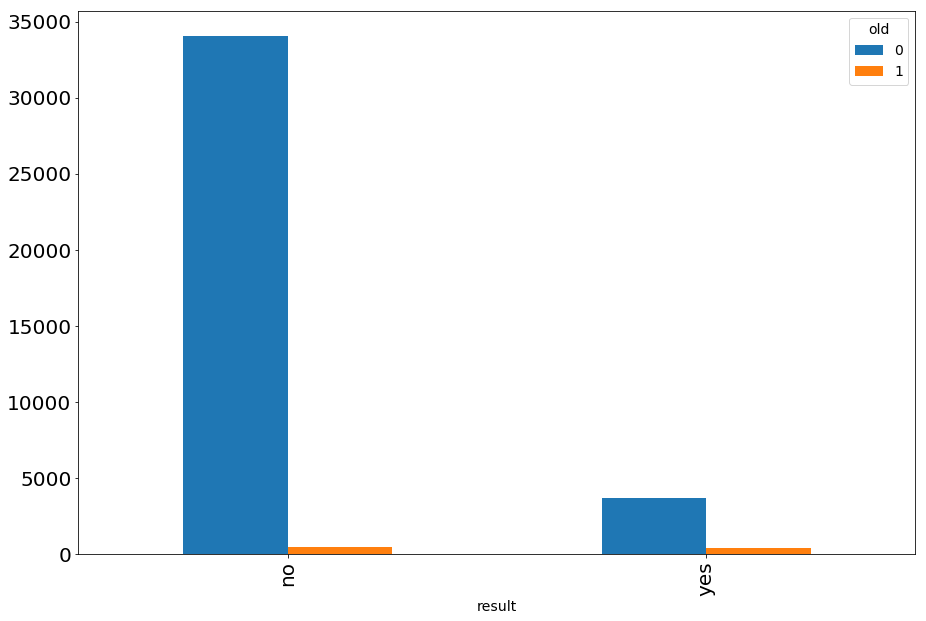

In [174]:
df['old'].value_counts()
pd.crosstab(df.result,df.old).plot(kind='bar',figsize=(15,10),fontsize=20)

Most of the customers in the bank are **middle aged** between age 60 to 36 and those are the customers who are high number with the customers who are not subcribed to the term deposit . There are very few **retired** old people who are still customers of the bank. 

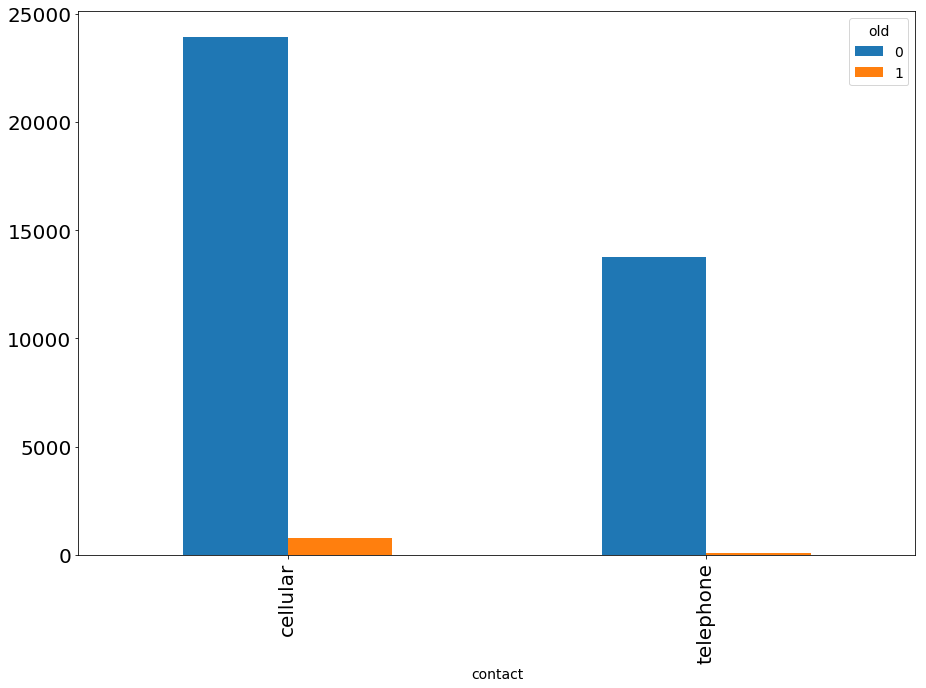

In [179]:
pd.crosstab(df.contact,df.old).plot(kind='bar',figsize=(15,10),fontsize=20)

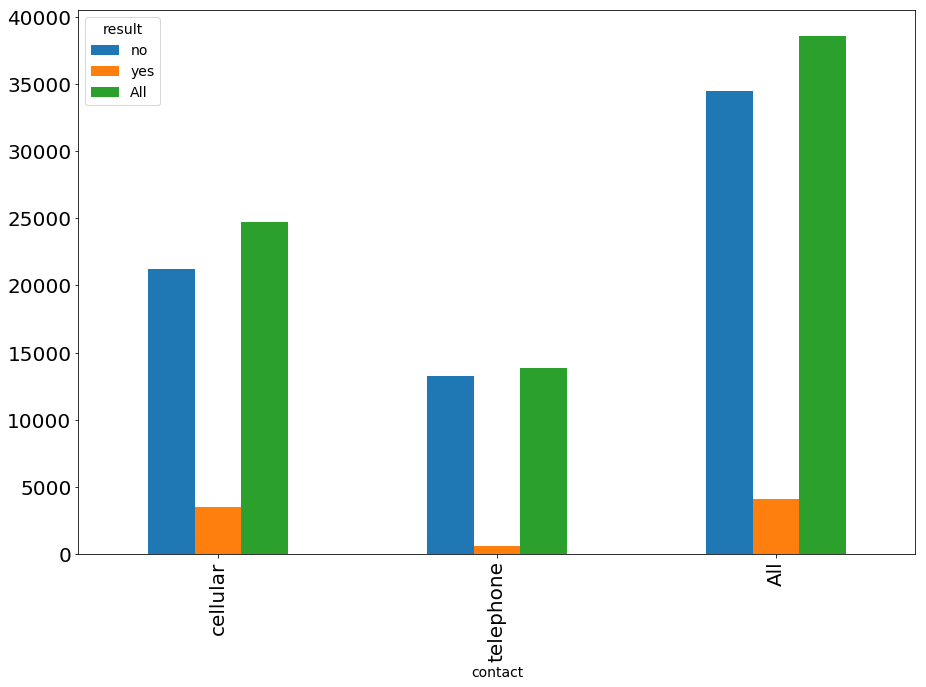

In [180]:
age_contact = pd.crosstab(index=df["contact"], 
                             columns=[df["result"]],
                             margins=True).plot(kind="bar",figsize=(15,10),fontsize=20)
age_contact

The above plot indicates that there are high number of subcribtion if the customer is contacted through **cellular**

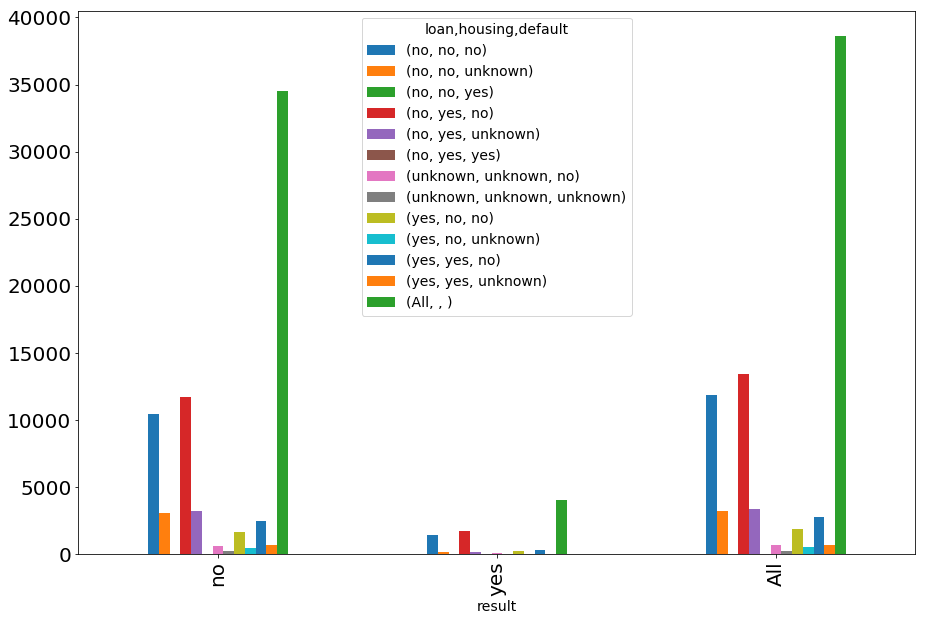

In [183]:
result_loan = pd.crosstab(index=df["result"], 
                             columns=[df["loan"],df["housing"],df["default"]],
                             margins=True).plot(kind="bar",figsize=(15,10),fontsize=20)
result_loan

The customers that have no housing loan, presonal loan but have default credits in the bank are niether subcribed nor unsubcribed . There are rough **1392** customers who subscribed to term deposit withoout any credit, house loand and personal loan.

day_of_week   fri        mon        thu        tue        wed         All
result         no  yes    no  yes    no  yes    no  yes    no  yes       
month                                                                    
apr           538   55   617   63   529  219   167   76   204   80   2548
aug           902  112  1067   96  1092  108  1076  122  1031  127   5733
dec            14    8    29   21    23   21    10   14    13   21    174
jul           836   93  1270   94  1354  114  1278  109  1214  108   6470
jun           908   75  1045  121   827   73   790  114   773  102   4828
mar            43   48    82   55    54   43    54   82    27   41    529
may          2503  162  2357  167  2283  126  2557  116  2632  159  13062
nov           644   76   689   59   793   81   721   81   767   74   3985
oct            71   67    84   41    89   73    80   66    68   62    701
sep            65   44    62   26    63   55    56   59    60   62    552
All          6524  740  7302  743  7107  913  6789  839  6789  836  38582

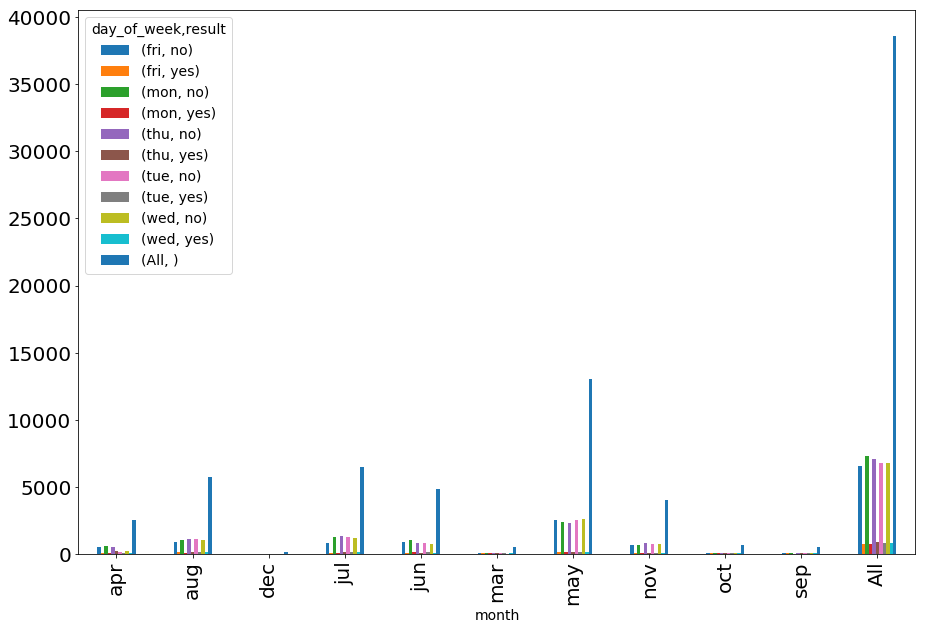

In [187]:
last_contact = pd.crosstab(index=df["month"], 
                             columns=[df["day_of_week"], df['result']],
                             margins=True).plot(kind="bar",figsize=(15,10),fontsize=20)
pd.crosstab(index=df["month"], 
                             columns=[df["day_of_week"], df['result']],
                             margins=True)
last_contact

For most of the customers , the last contact for the campaign was done on **monday**  and **thursday**. Most of the customers subcrided when they were last contacted on the month of april especially on thurdays.

# Conclusion on Analysis :

*  Data is skewed towards both left and right except 'cons_price_idx' and 'cons_conf_idx' i.e. existence of skewness brings us to a point that data is non-linear, asymmetric

* More number of customer campaiging happened on the month of may

* Most of the customers have admin as their employment with marital status as married and have no loan in the bank

* Highest correlation between 'pdays' and 'previous', both are dependent on each other

* The highest percentage of subscription according to the job type is customers with job type as 'student' with 0.3 %

* Out of 38582 , there are 4071 customers that are subcribered where in married as per bank deatils in which 2755 which is approximately 10% are subscribed but the highest percentage are who subscribed are 'single' with 14% though they contribute 28.29% in the overall customers

* Most of the customers have education category has 'university.degree' with a count of 11387 but still customers with 'illiterate' has the highest percentage of subscription

* High number of subcribtion if the customer is contacted through cellular

* There are rough 1392 customers who subscribed to term deposit withoout any credit, house loan and personal loan

* There are rough 1392 customers who subscribed to term deposit withoout any credit, house loand and personal loan

* The last contact for the campaign was mostly on monday and thursday
